# Fuentes de Datos Abiertos

Los datos abiertos son fuentes de datos disponibles en Internet que proporcionan información de manera gratuita a cualquier persona que la necesite. Estas fuentes de datos han crecido considerablemente debido a la creciente demanda de datos para diversos fines. A continuación, se presenta una lista de algunas de las fuentes de datos abiertos disponibles en línea:

## Lista de Fuentes de Datos Abiertos

1. **DataHub**  
   - [datahub.io/dataset](http://datahub.io/dataset)
   - Una plataforma para encontrar, compartir y usar datos.

2. **Organización Mundial de la Salud (OMS)**
   - [who.int/research/en](http://www.who.int/research/en/)
   - Proporciona acceso a datos relacionados con la salud mundial.

3. **Data.gov**
   - [data.gov](http://data.gov)
   - El portal de datos abiertos del gobierno de los Estados Unidos.

4. **Portal de Datos Abiertos de la Unión Europea**
   - [open-data.europa.eu/en/data/](http://open-data.europa.eu/en/data/)
   - Acceso a datos de la Unión Europea.

5. **Conjuntos de Datos Públicos de Amazon Web Services**
   - [aws.amazon.com/datasets](http://aws.amazon.com/datasets)
   - Datos disponibles para análisis en la nube de AWS.

6. **Facebook Graph**
   - [developers.facebook.com/docs/graph-api](http://developers.facebook.com/docs/graph-api)
   - Permite acceder a datos de Facebook mediante su API.

7. **Healthdata.gov**
   - [healthdata.gov](http://www.healthdata.gov)
   - Portal de datos de salud de los Estados Unidos.

8. **Google Trends**
   - [google.com/trends/explore](http://www.google.com/trends/explore)
   - Herramienta para analizar la popularidad de términos de búsqueda.

9. **Google Finance**
   - [google.com/finance](https://www.google.com/finance)
   - Acceso a información financiera y de mercado.

10. **Google Books Ngrams**
    - [storage.googleapis.com/books/ngrams/books/datasetsv2.html](http://storage.googleapis.com/books/ngrams/books/datasetsv2.html)
    - Datos para el análisis de tendencias en libros.

11. **Repositorio de Machine Learning**
    - [archive.ics.uci.edu/ml/](http://archive.ics.uci.edu/ml/)
    - Conjunto de datos para el aprendizaje automático y la investigación.

## Diagrama de la Nube LOD

Para obtener una idea de las fuentes de datos abiertos disponibles en línea, puedes consultar el diagrama de la nube LOD (Linked Open Data), que muestra todas las conexiones de enlaces de datos entre varias fuentes de datos abiertas actualmente disponibles en la red. Puedes verlo en [lod-cloud.net](http://lod-cloud.net).

Estas fuentes de datos abiertos proporcionan un acceso invaluable a datos que pueden ser utilizados para investigación, análisis y desarrollo de proyectos en diversas disciplinas. Si necesitas más información sobre cómo acceder o utilizar estos datos, no dudes en preguntarme.


## Ejemplo: Análisis de Datos de COVID-19

En este caso, vamos a utilizar el conjunto de datos sobre COVID-19 de Our World in Data, que está disponible públicamente en formato CSV a través de un enlace directo. Utilizaremos pandas para descargar y analizar los datos.

Este ejemplo descargará datos sobre COVID-19 y realizará un análisis básico para mostrar el número promedio de casos diarios en un país específico.

Primeras filas del conjunto de datos:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_t

/tmp/ipykernel_283115/706800614.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pais['date'] = pd.to_datetime(df_pais['date'])


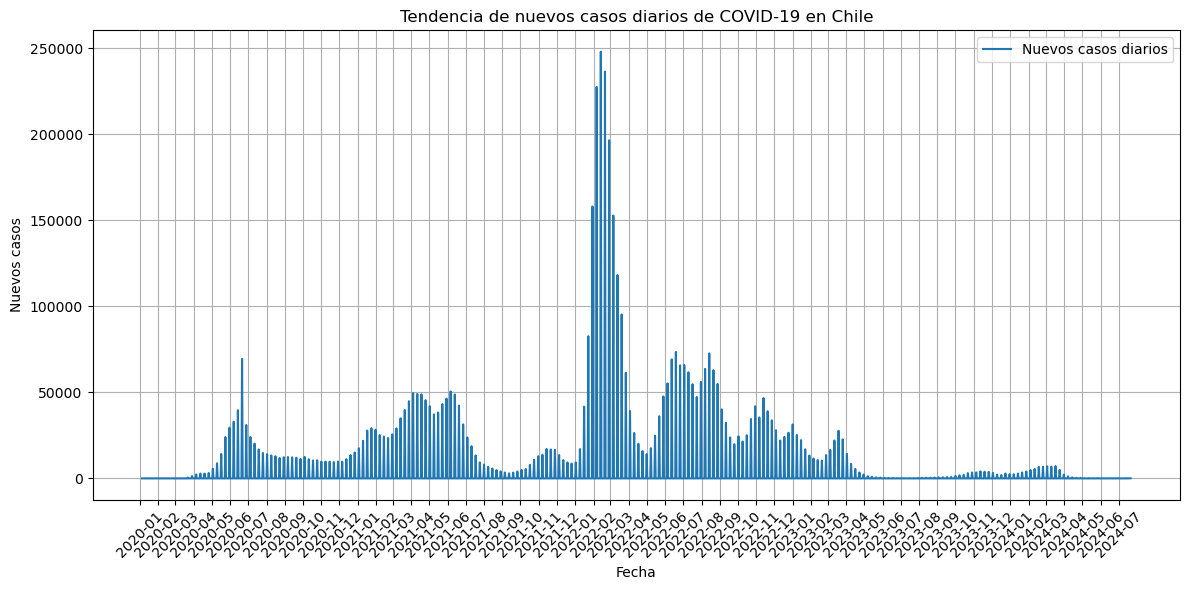

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# URL del conjunto de datos de COVID-19 de Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

# Descargar y cargar el conjunto de datos en un DataFrame de pandas
df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
print("Primeras filas del conjunto de datos:")
print(df.head())

# Filtrar los datos para un país específico, por ejemplo, Chile
pais = "Chile"
df_pais = df[df['location'] == pais]

# Convertir la columna 'date' a tipo datetime
df_pais['date'] = pd.to_datetime(df_pais['date'])

# Calcular el promedio de nuevos casos diarios
promedio_casos_diarios = df_pais['new_cases'].mean()

print(f"\nPromedio de nuevos casos diarios en {pais}: {promedio_casos_diarios:.2f}")

# Visualizar la tendencia de nuevos casos diarios
plt.figure(figsize=(12, 6))
plt.plot(df_pais['date'], df_pais['new_cases'], label='Nuevos casos diarios')
plt.title(f"Tendencia de nuevos casos diarios de COVID-19 en {pais}")
plt.xlabel('Fecha')
plt.ylabel('Nuevos casos')

# Configurar etiquetas de mes en el eje X
meses = df_pais['date'].dt.to_period('M').unique()
plt.xticks(ticks=meses.to_timestamp(), labels=meses.astype(str), rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
